<a href="https://colab.research.google.com/github/faridahamid/Sales-prediction/blob/main/Weekly_Sales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score ,confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import davies_bouldin_score
import matplotlib.dates as mdates

In [ ]:
data_sales=pd.read_csv("/content/sales - sales.csv")
data_sales.shape

(421570, 5)

In [ ]:
data_weather=pd.read_csv("/content/weather - weather.csv")
data_weather.shape

(8190, 3)

In [ ]:
data_fuel=pd.read_csv("/content/fuel pricing - fuel pricing.csv")
data_fuel.shape

(8190, 3)

In [ ]:
merged_data = pd.merge(data_sales, data_fuel, on=['Date', 'Store'], how='left')
merged_data = pd.merge(merged_data, data_weather, on=['Date', 'Store'], how='left')
merged_data.head(10)

,Store,Category,Date,Weekly_Sales,Holiday,Fuel_Price,Temperature
0,1,1,2010-02-05,24924.50,False,2.572,42.31
1,1,1,2010-02-12,46039.49,True,2.548,38.51
2,1,1,2010-02-19,41595.55,False,2.514,39.93
3,1,1,2010-02-26,19403.54,False,2.561,46.63
4,1,1,2010-03-05,21827.90,False,2.625,46.50
5,1,1,2010-03-12,21043.39,False,2.667,57.79
6,1,1,2010-03-19,22136.64,False,2.720,54.58
7,1,1,2010-03-26,26229.21,False,2.732,51.45
8,1,1,2010-04-02,57258.43,False,2.719,62.27
9,1,1,2010-04-09,42960.91,False,2.770,65.86


In [ ]:
merged_data.shape

(421570, 7)

In [ ]:
merged_data.isnull().sum()

Store           0
Category        0
Date            0
Weekly_Sales    0
Holiday         0
Fuel_Price      0
Temperature     0
dtype: int64

In [ ]:
merged_data.duplicated().sum()

0

In [ ]:
merged_data.dtypes

Store             int64
Category          int64
Date             object
Weekly_Sales    float64
Holiday            bool
Fuel_Price      float64
Temperature     float64
dtype: object

In [ ]:
data_sales.head(10)

,Store,Category,Date,Weekly_Sales,Holiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [ ]:
data_weather.head(10)

,Store,Date,Temperature
0,1,2010-02-05,42.31
1,1,2010-02-12,38.51
2,1,2010-02-19,39.93
3,1,2010-02-26,46.63
4,1,2010-03-05,46.50
5,1,2010-03-12,57.79
6,1,2010-03-19,54.58
7,1,2010-03-26,51.45
8,1,2010-04-02,62.27
9,1,2010-04-09,65.86


In [ ]:
data_fuel.head(10)

,Store,Date,Fuel_Price
0,1,2010-02-05,2.572
1,1,2010-02-12,2.548
2,1,2010-02-19,2.514
3,1,2010-02-26,2.561
4,1,2010-03-05,2.625
5,1,2010-03-12,2.667
6,1,2010-03-19,2.720
7,1,2010-03-26,2.732
8,1,2010-04-02,2.719
9,1,2010-04-09,2.770


In [ ]:
data_sales.dtypes

Store             int64
Category          int64
Date             object
Weekly_Sales    float64
Holiday            bool
dtype: object

In [ ]:
data_weather.dtypes

Store            int64
Date            object
Temperature    float64
dtype: object

In [ ]:
data_fuel.dtypes

Store           int64
Date           object
Fuel_Price    float64
dtype: object

In [ ]:
data_sales.isnull().sum()

Store           0
Category        0
Date            0
Weekly_Sales    0
Holiday         0
dtype: int64


**The Sales Data here doesn't contain Null values**

In [ ]:
data_weather.isnull().sum()

Store          0
Date           0
Temperature    0
dtype: int64

**NO null values in weather data**

In [ ]:
data_fuel.isnull().sum()

Store         0
Date          0
Fuel_Price    0
dtype: int64

**NO null values in fuel**

In [ ]:
num=data_sales.select_dtypes(include=['number']).columns
(data_sales[num] <= 0).sum()

Store              0
Category           0
Weekly_Sales    1358
dtype: int64

**Weekly Sales here contains zeros or negative values and this is incorrect values
**

In [ ]:
data_sales.describe()

,Store,Category,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


 **Looking at this statistics we can see that**

**1. data has no nulls as shown previously as the number of stores ,categories,Dte and weekly_sales are the same**

**2. The Presence of incorrect values in the weekly sales as mentioned previously also as the minimum is a negative value**

**3. The data in the weekly_sales seems to be right_skewed as  large maximum sales value (693,099.36) compared to the mean and quartile values suggests a right-skewed distribution and the IQR between Q1 and Q3 (20,205.85 - 2,079.65 = 18,126.20) indicates the spread of the middle 50% of the data and can suggest presence of outliers.**

**So let's take a look and see if this assumptions are right or not using visualizations.**



In [ ]:
data_weather.describe()

,Store,Temperature
count,8190.000000,8190.000000
mean,23.000000,59.356198
std,12.987966,18.678607
min,1.000000,-7.290000
25%,12.000000,45.902500
50%,23.000000,60.710000
75%,34.000000,73.880000
max,45.000000,101.950000


**Looking at this statistics we can see that:

1- Data has no null values as the count is complete.

2-From the look at median and mean the data is approximatively equal
so let's take a look at visualizations.**

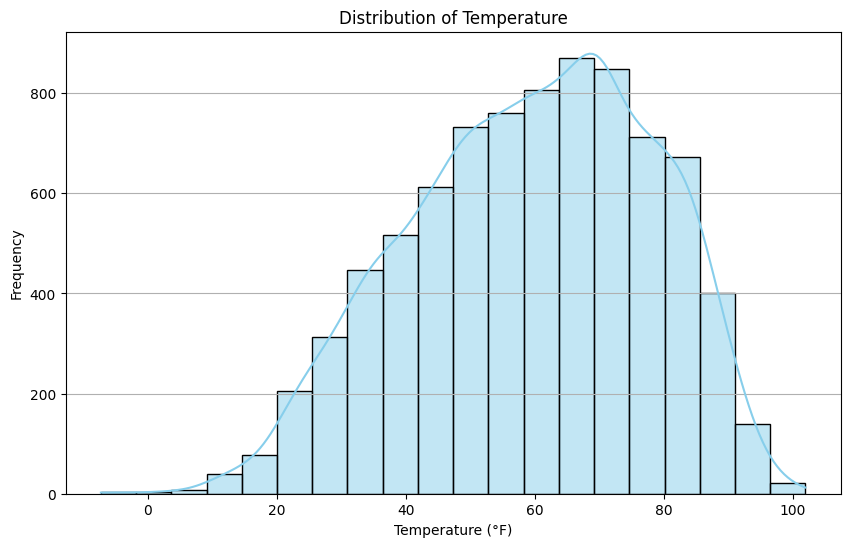

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_weather['Temperature'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [ ]:
data_fuel.describe()

,Store,Fuel_Price
count,8190.000000,8190.000000
mean,23.000000,3.405992
std,12.987966,0.431337
min,1.000000,2.472000
25%,12.000000,3.041000
50%,23.000000,3.513000
75%,34.000000,3.743000
max,45.000000,4.468000


**Looking at this statistics we can see that:

1- Data has no null values as the count is complete.

2-From the look at median and mean the data is approximatively equal
so let's take a look at visualizations.**

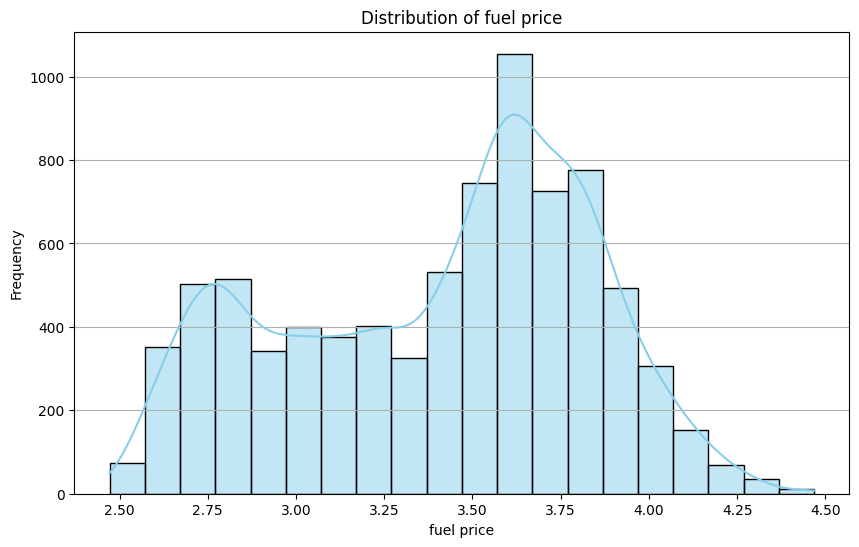

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data_fuel['Fuel_Price'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of fuel price')
plt.xlabel('fuel price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [ ]:
date = ['Date']
for i in date:
    data_sales[i] = pd.to_datetime(data_sales[i])
for i in date:
    incorrect = data_sales[data_sales[i] > datetime.today()]
    if not incorrect.empty:
        print(f"Invalid dates found in column '{i}':")
        print(incorrect)
    else:
        print(f"No invalid dates found in column '{i}'.")

No invalid dates found in column 'Date'.


In [ ]:
invalid_months = data_sales[(data_sales[i].dt.month < 1) | (data_sales[i].dt.month > 12)]
invalid_days = data_sales[(data_sales[i].dt.day < 1) | (data_sales[i].dt.day > 31)]
if not invalid_months.empty:
        print(f"Invalid months found in column '{i}':")
        print(invalid_months)
else:
        print(f"No invalid months found in column '{i}'.")
if not invalid_days.empty:
        print(f"Invalid days found in column '{i}':")
        print(invalid_days)
else:
   print(f"No invalid days found in column '{i}'.")


No invalid months found in column 'Date'.
No invalid days found in column 'Date'.


**In the date column no incorrect date that perceeds today's date and the months and days are also correct.
**

**No incorrect data in the date**

In [ ]:

data_sales = data_sales[data_sales['Weekly_Sales'] > 0]


**Removing incorrect values in weekly sales **

In [ ]:

data_sales['Holiday'] = data_sales['Holiday'].astype(int)


<ipython-input-28-c78c17e46e1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sales['Holiday'] = data_sales['Holiday'].astype(int)


**Converting the holiday which is boolen (True/False) to int (0/1)**

In [ ]:
data_sales.head(10)

,Store,Category,Date,Weekly_Sales,Holiday
0,1,1,2010-02-05,24924.50,0
1,1,1,2010-02-12,46039.49,1
2,1,1,2010-02-19,41595.55,0
3,1,1,2010-02-26,19403.54,0
4,1,1,2010-03-05,21827.90,0
5,1,1,2010-03-12,21043.39,0
6,1,1,2010-03-19,22136.64,0
7,1,1,2010-03-26,26229.21,0
8,1,1,2010-04-02,57258.43,0
9,1,1,2010-04-09,42960.91,0


In [ ]:
data_sales.dtypes

Store                    int64
Category                 int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday                  int64
dtype: object

In [ ]:
data_sales.describe()

,Store,Category,Date,Weekly_Sales,Holiday
count,420212.000000,420212.000000,420212,420212.000000,420212.000000
mean,22.195611,44.241309,2011-06-18 07:35:12.682169600,16033.114591,0.070345
min,1.000000,1.000000,2010-02-05 00:00:00,0.010000,0.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2120.130000,0.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7661.700000,0.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20271.265000,0.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,1.000000
std,12.787236,30.508819,NaN,22729.492116,0.255729


**Here we can see the minimum changed to be a positive number**

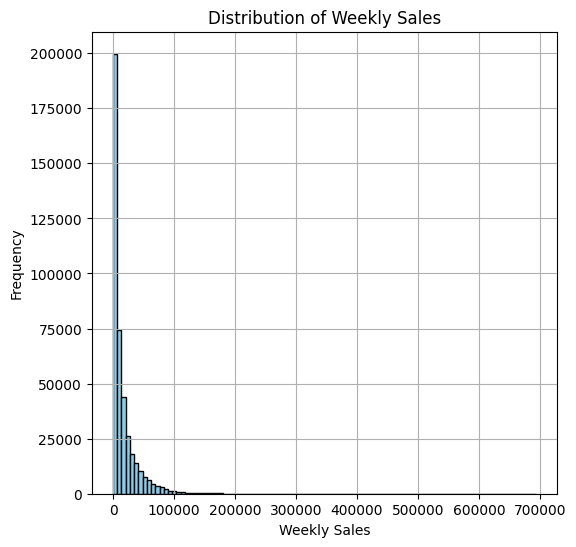

In [ ]:
plt.figure(figsize=(6, 6))
plt.hist(data_sales['Weekly_Sales'], bins=100, color='skyblue', edgecolor='black')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**It seems to be right skewed as we assumed **

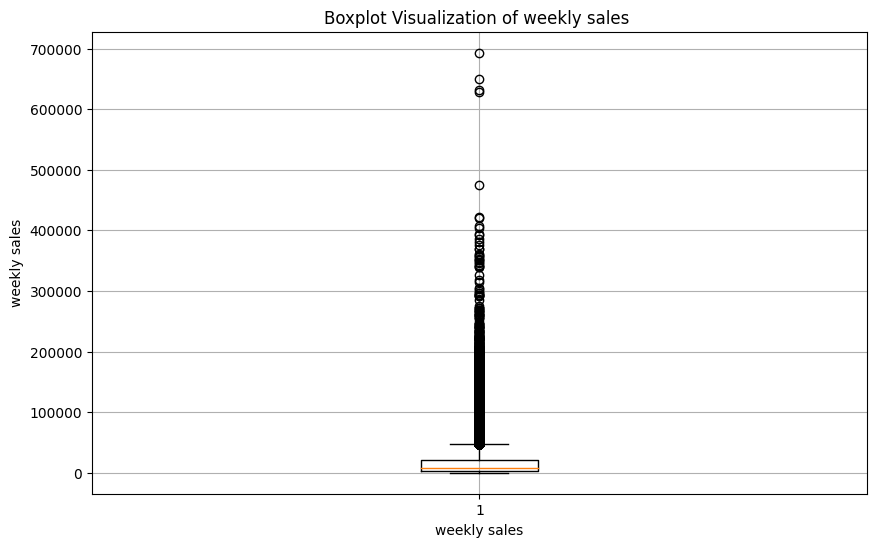

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(data_sales['Weekly_Sales'])
plt.title('Boxplot Visualization of weekly sales ')
plt.ylabel('weekly sales')
plt.xlabel('weekly sales')
plt.grid(True)
plt.show()

**As assumed there are outliers in the weekly sales but in this case is this outliers important or not?**

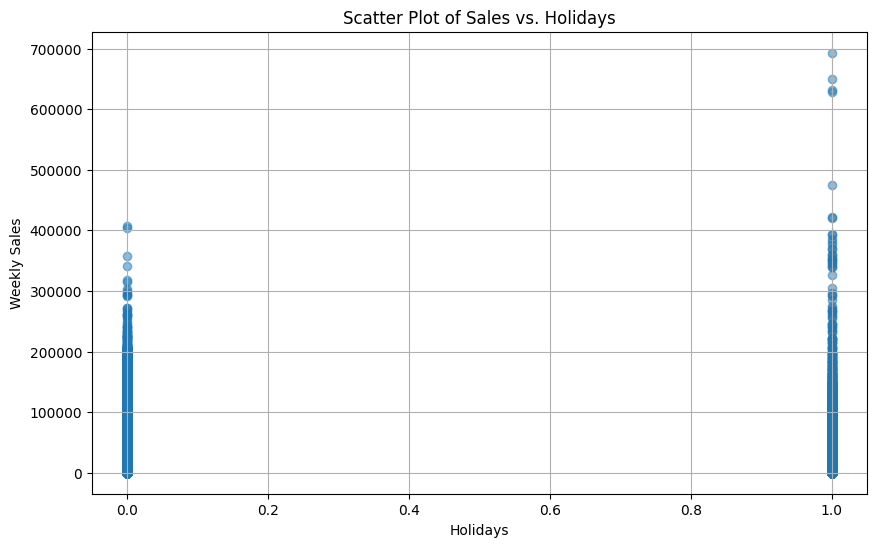

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_sales['Holiday'], data_sales['Weekly_Sales'], alpha=0.5)
plt.title('Scatter Plot of Sales vs. Holidays')
plt.xlabel('Holidays')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

**From this visualization we can say that there is a relation between the holidays and the weekly sales  appears to be more when there is a holiday.
**

                 Store  Category      Date  Weekly_Sales   Holiday
Store         1.000000  0.024258  0.003159     -0.085117 -0.000522
Category      0.024258  1.000000  0.003993      0.148749  0.000663
Date          0.003159  0.003993  1.000000     -0.000571 -0.012957
Weekly_Sales -0.085117  0.148749 -0.000571      1.000000  0.012843
Holiday      -0.000522  0.000663 -0.012957      0.012843  1.000000


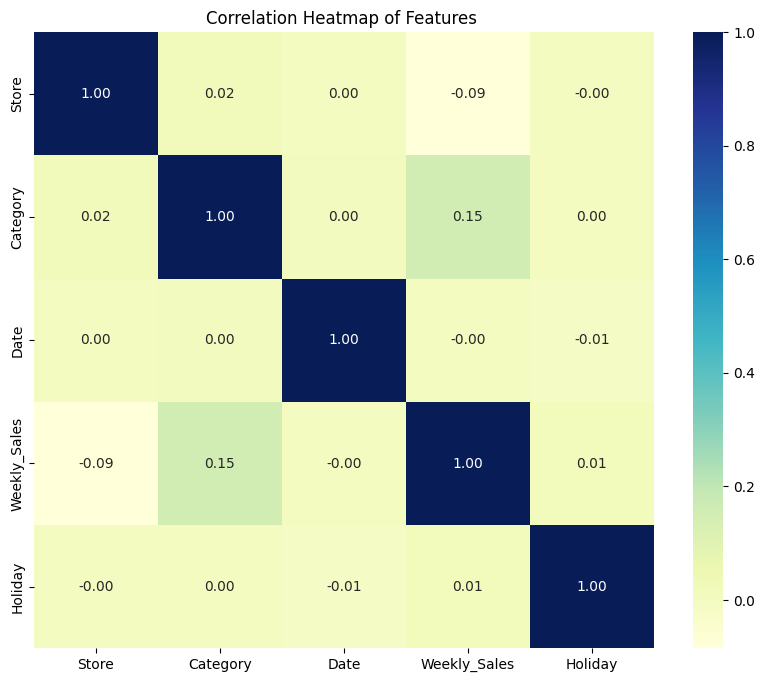

In [ ]:
correlation_matrix = data_sales.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
print(data_sales.corr())
plt.title('Correlation Heatmap of Features ')
plt.show()

**Here from the correlation map i see that the correlation between the category and the weekly sales is greater than that with the holidays**

In [ ]:

aggregated_data = data_sales.groupby(['Holiday', 'Category'])['Weekly_Sales'].mean().reset_index()
fig = px.bar(aggregated_data, x='Category', y='Weekly_Sales', color='Holiday', barmode='group',
             labels={'Weekly_Sales': 'Average Weekly Sales', 'Holiday': 'Holiday'},
             title='Average Weekly Sales by Category and Holidays')
fig.update_layout(xaxis={'categoryorder': 'total ascending'})
fig.show()

**It seems like in the last range of category we have the largest sales**

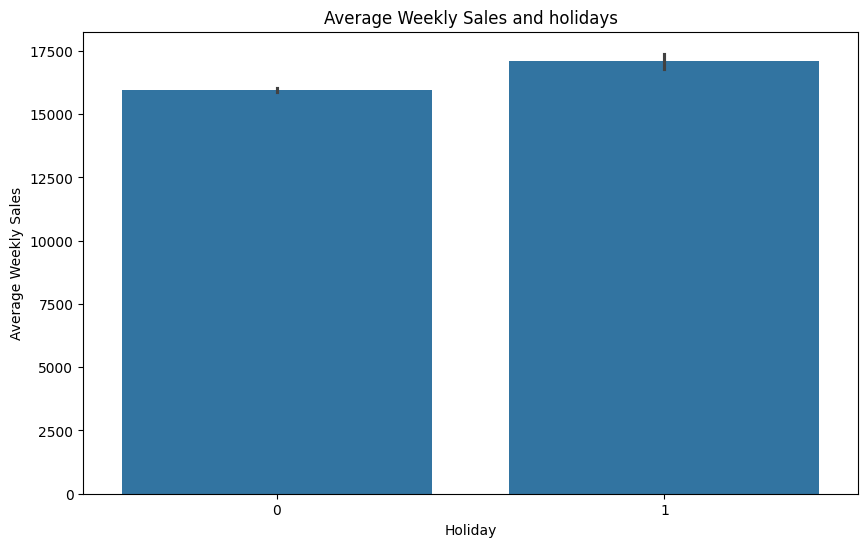

In [ ]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday', y='Weekly_Sales', data=data_sales)
plt.title('Average Weekly Sales and holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Weekly Sales')
plt.show()


**As assumed at holidays the weekly sales are more.**

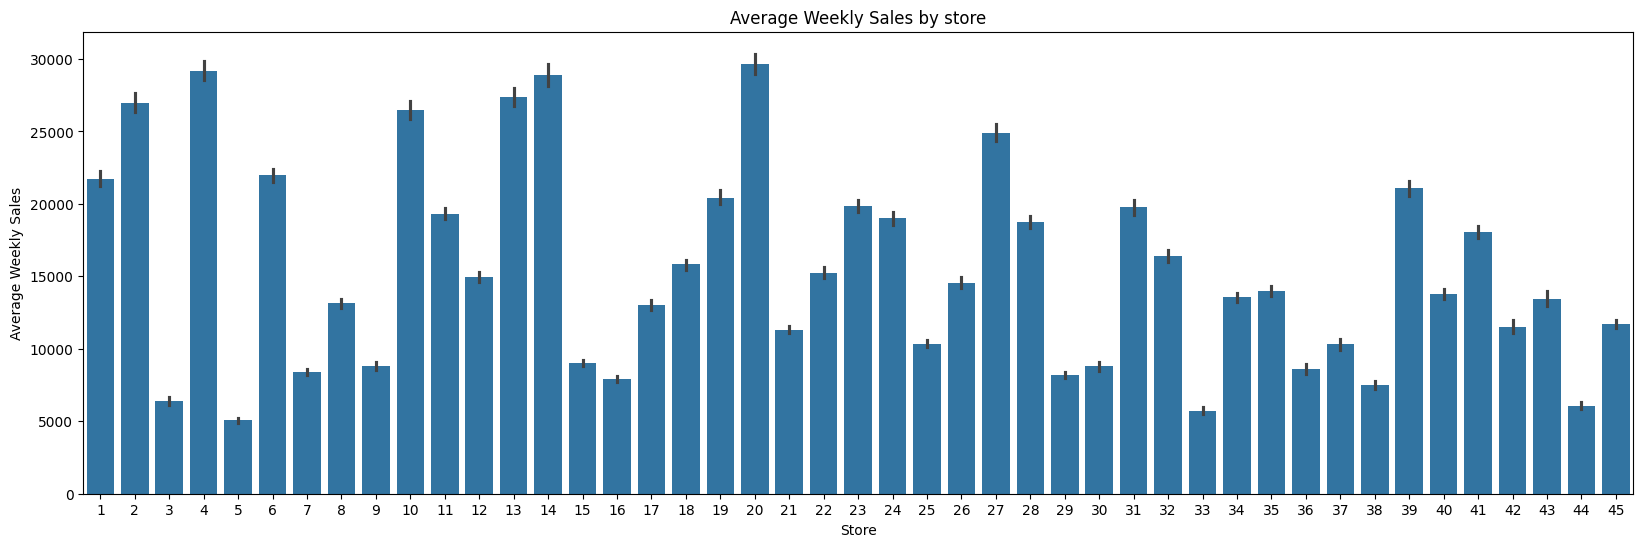

In [ ]:

plt.figure(figsize=(20, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=data_sales)
plt.title('Average Weekly Sales by store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.show()


**As seen the store 20 has the maximum weekly sales and 5 is the least**

In [ ]:
data_c=merged_data.copy()
Q1 = data_c['Weekly_Sales'].quantile(0.25)
Q3 = data_c['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_c = data_c[(data_c['Weekly_Sales'] >= lower_bound) & (data_c['Weekly_Sales'] <= upper_bound)]

data_c['Weekly_Sales'] = data_c['Weekly_Sales'].replace(to_replace=(0, -1), value=data_c['Weekly_Sales'].min())


In [ ]:
merged_data = merged_data[merged_data['Weekly_Sales'] > 0]

In [ ]:

merged_data['Holiday'] = merged_data['Holiday'].astype(int)

<ipython-input-41-f6e1d8175f46>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
num=data_c.select_dtypes(include=['number']).columns
(data_c[num] < 0).sum()

Store              0
Category           0
Weekly_Sales    1358
Fuel_Price         0
Temperature       68
dtype: int64

In [ ]:
merged_data.isnull().sum()

Store           0
Category        0
Date            0
Weekly_Sales    0
Holiday         0
Fuel_Price      0
Temperature     0
dtype: int64

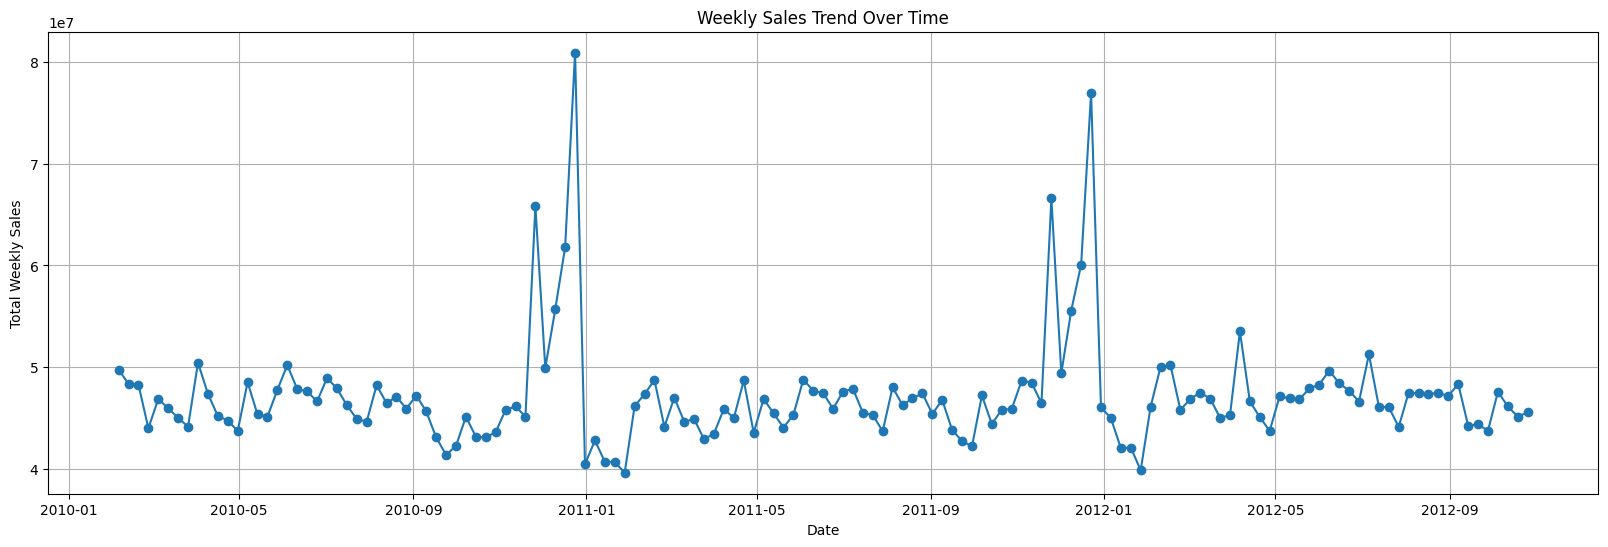

In [ ]:
# 1 to illustrate if weekly sales are increasing or decreasing over time.
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
weekly_sales = merged_data.groupby('Date')['Weekly_Sales'].sum()
plt.figure(figsize=(20, 6))
plt.plot(weekly_sales.index, weekly_sales.values, marker='o', linestyle='-')
plt.title('Weekly Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()

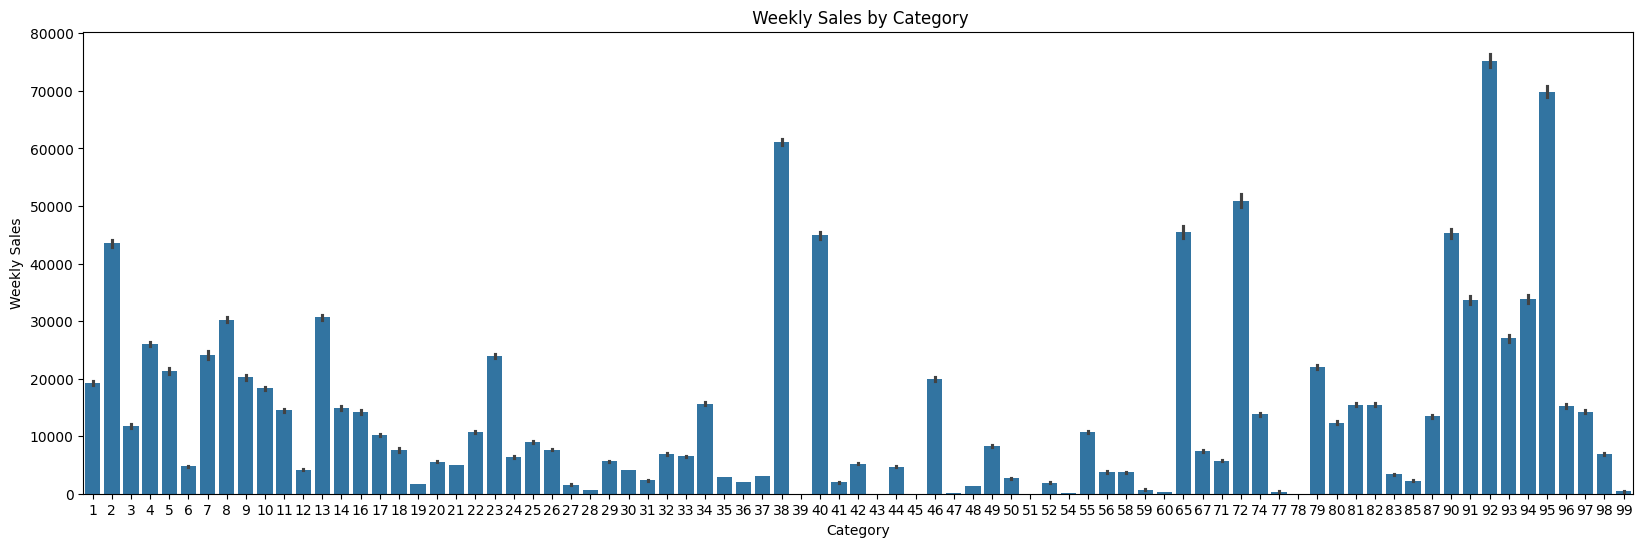

In [ ]:
# 2 to show how much each brand sells.
plt.figure(figsize=(20, 6))
sns.barplot(x='Category', y='Weekly_Sales', data=merged_data)
plt.title(' Weekly Sales by Category')
plt.xlabel('Category')
plt.ylabel('Weekly Sales')
plt.show()


In [ ]:

store_sales_sorted = merged_data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
top_10_stores = store_sales_sorted.head(10)
top_10_sales_data = merged_data[merged_data['Store'].isin(top_10_stores.index)]
print("The top 10 stores are: ",top_10_stores)


The top 10 stores are:  Store
20    3.014014e+08
4     2.995453e+08
14    2.890019e+08
13    2.865180e+08
2     2.753872e+08
10    2.716241e+08
27    2.538572e+08
6     2.237586e+08
1     2.224068e+08
39    2.074465e+08
Name: Weekly_Sales, dtype: float64


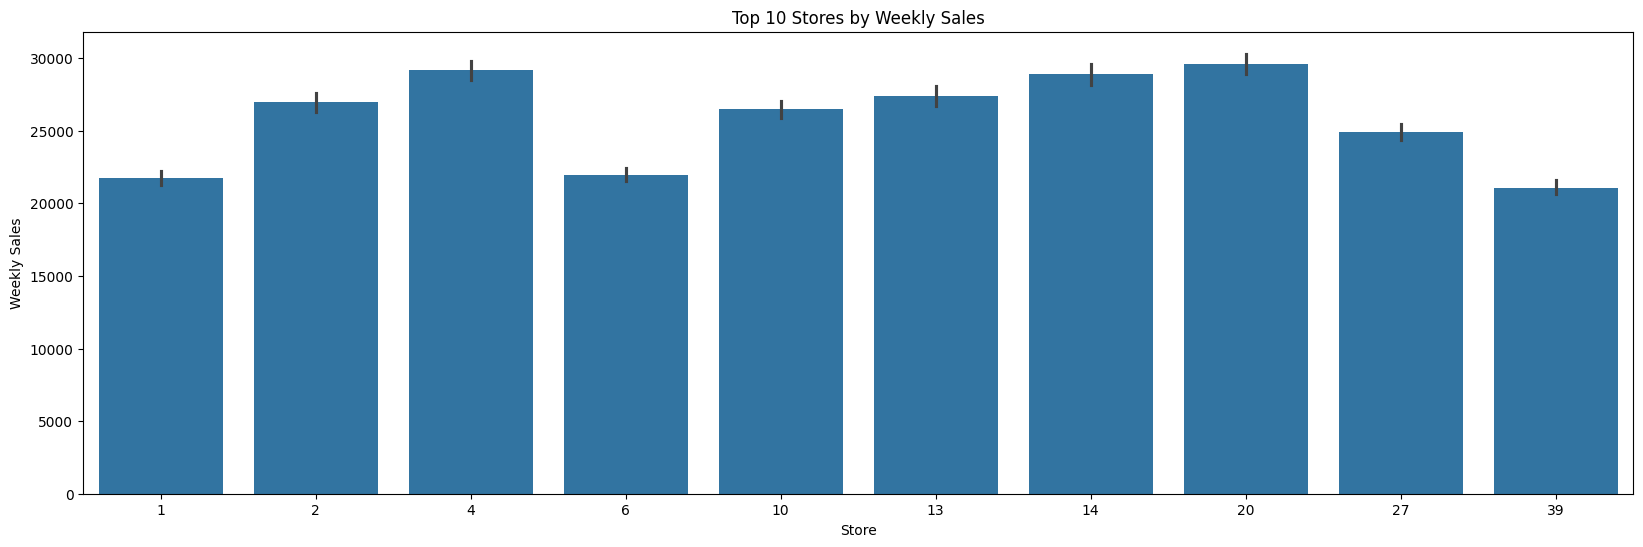

In [ ]:
#3
plt.figure(figsize=(20, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=top_10_sales_data)
plt.title('Top 10 Stores by Weekly Sales')
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.show()


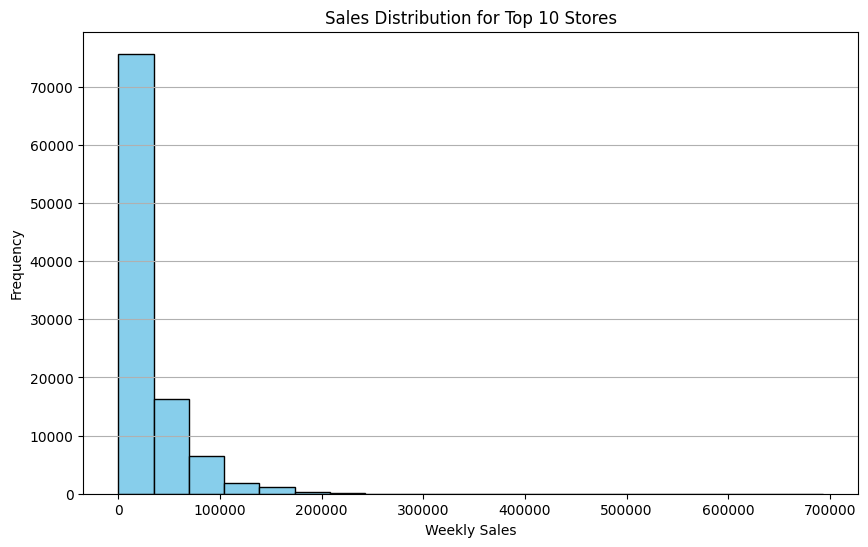

In [ ]:
#histogram to show the top 10 stores sales.
plt.figure(figsize=(10, 6))
plt.hist(top_10_sales_data['Weekly_Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sales Distribution for Top 10 Stores')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

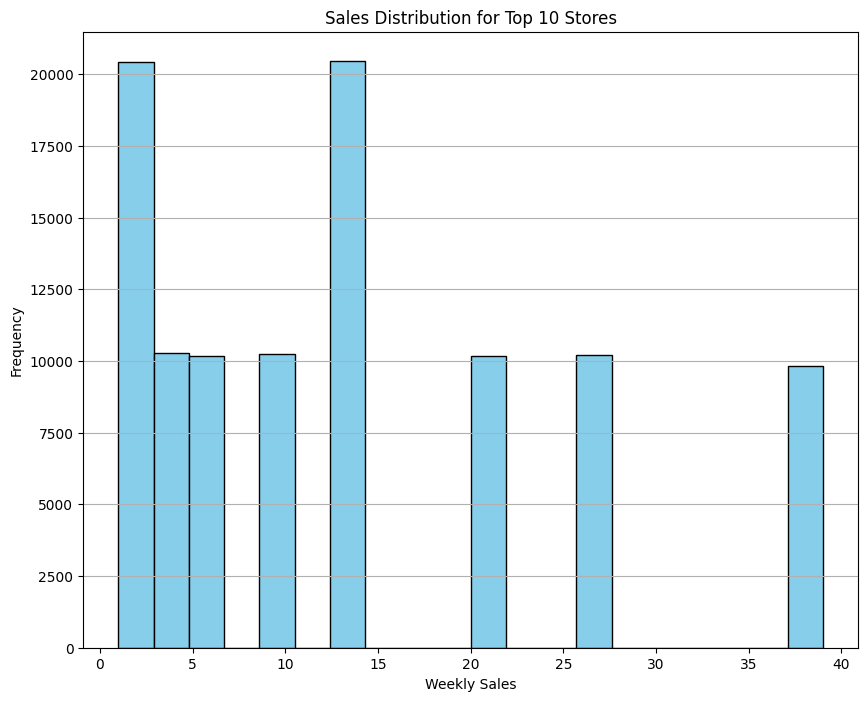

In [ ]:
plt.figure(figsize=(10, 8))
plt.hist(top_10_sales_data['Store'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sales Distribution for Top 10 Stores')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

**Weekly sales of top 10 stores
**

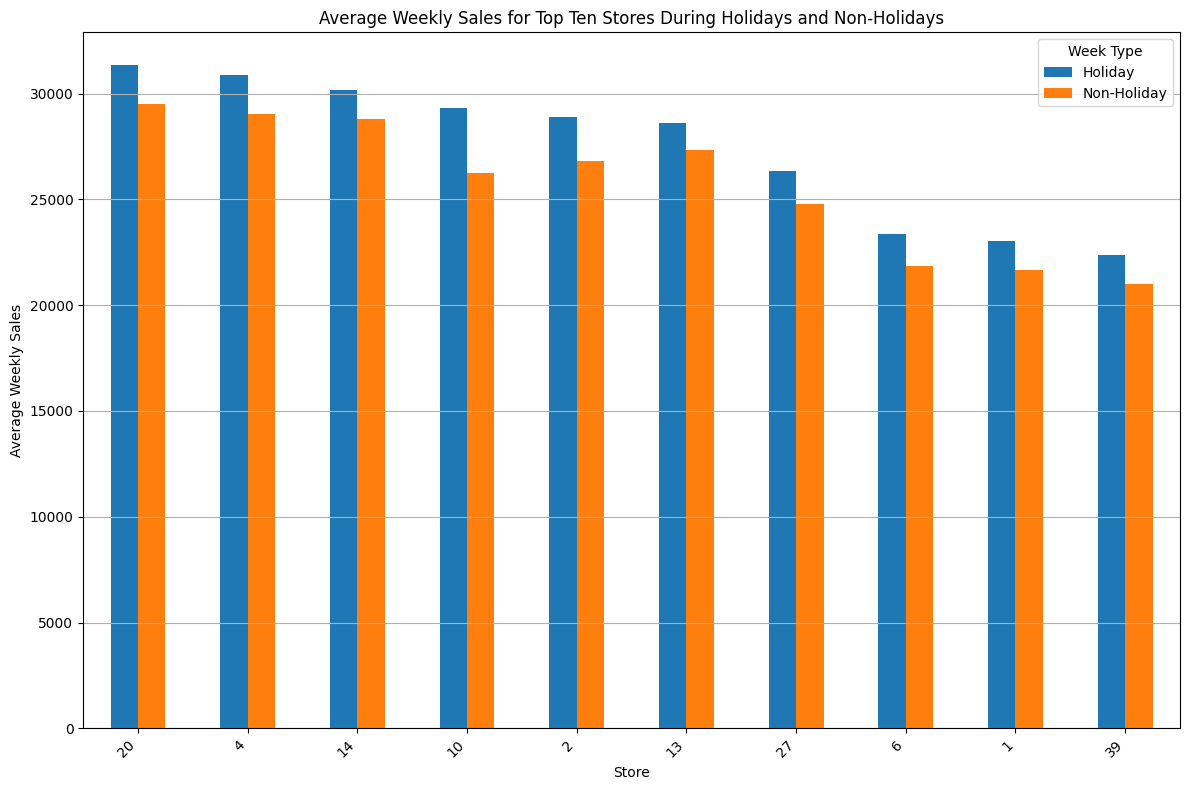

In [ ]:
#that compares average weekly sales for the top ten selling stores during holidays and non-holidays.
sales_store = merged_data.groupby(['Store', 'Holiday'])['Weekly_Sales'].mean().unstack()
top_stores_holiday = sales_store[1].sort_values(ascending=False).head(10)
top_stores_non_holiday = sales_store[0].sort_values(ascending=False).head(10)
top_combined = pd.concat([top_stores_holiday, top_stores_non_holiday], axis=1)
top_combined.columns = ['Holiday', 'Non-Holiday']
plt.figure(figsize=(12, 8))
top_combined.plot(kind='bar', ax=plt.gca())
plt.title('Average Weekly Sales for Top Ten Stores During Holidays and Non-Holidays')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Week Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


<Figure size 10000x800 with 0 Axes>

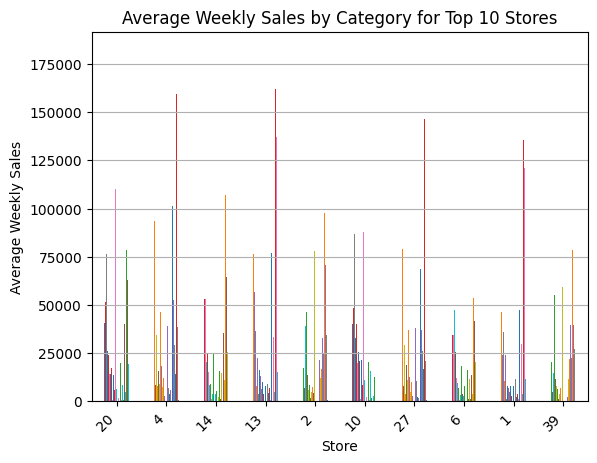

In [ ]:
#6
avg_sales_by_category_store = merged_data.groupby(['Store', 'Category'])['Weekly_Sales'].mean().unstack()
top_10_stores = avg_sales_by_category_store.sum(axis=1).nlargest(10).index

top_10_data = avg_sales_by_category_store.loc[top_10_stores]
plt.figure(figsize=(100, 8))
top_10_data.plot(kind='bar',legend=False)
plt.title('Average Weekly Sales by Category for Top 10 Stores')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45, ha='right')
#plt.legend(title='Category')
plt.grid(axis='y')
plt.show()

<Figure size 2500x600 with 0 Axes>

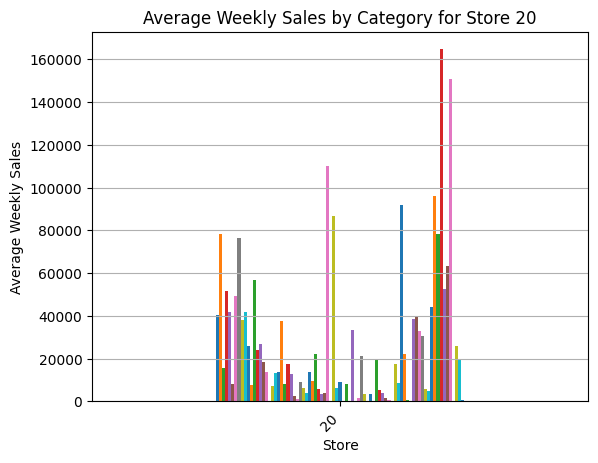

<Figure size 2500x600 with 0 Axes>

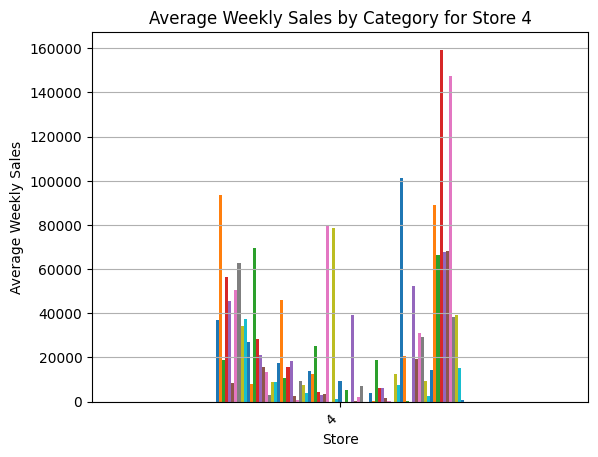

<Figure size 2500x600 with 0 Axes>

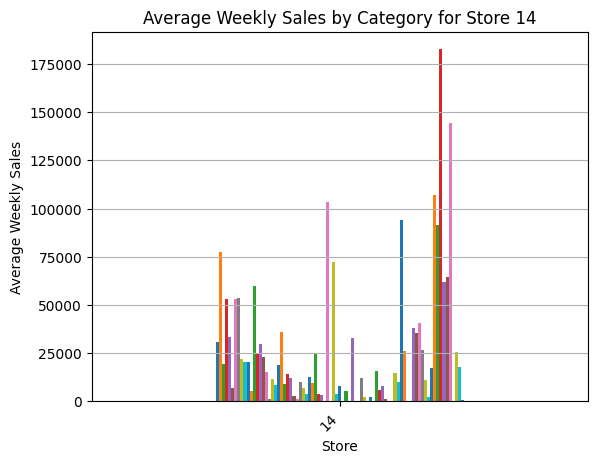

<Figure size 2500x600 with 0 Axes>

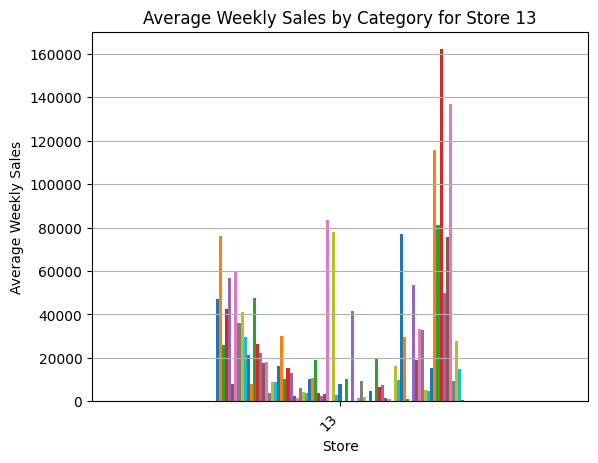

<Figure size 2500x600 with 0 Axes>

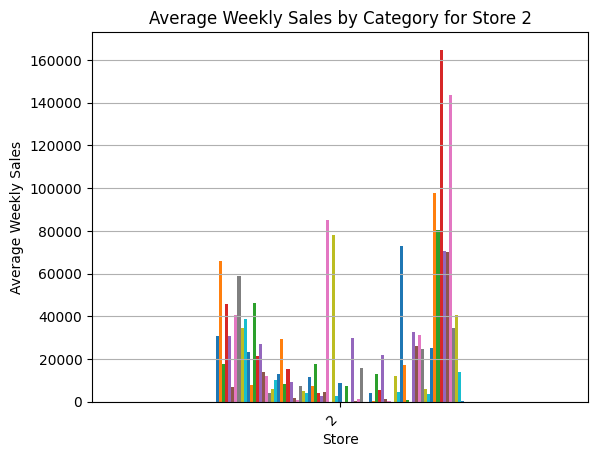

<Figure size 2500x600 with 0 Axes>

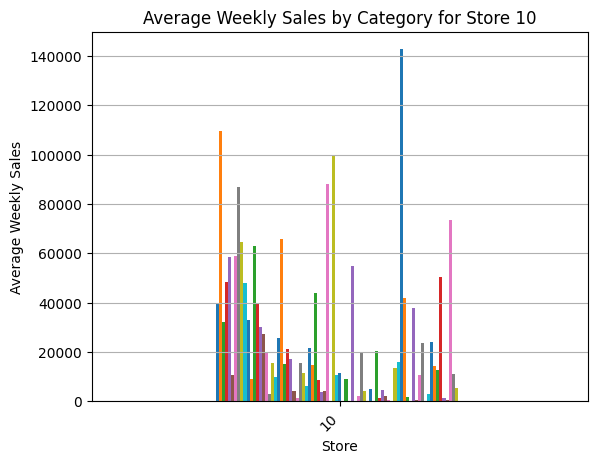

<Figure size 2500x600 with 0 Axes>

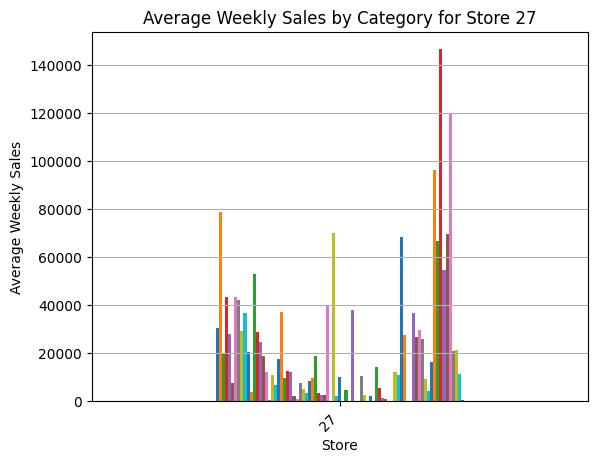

<Figure size 2500x600 with 0 Axes>

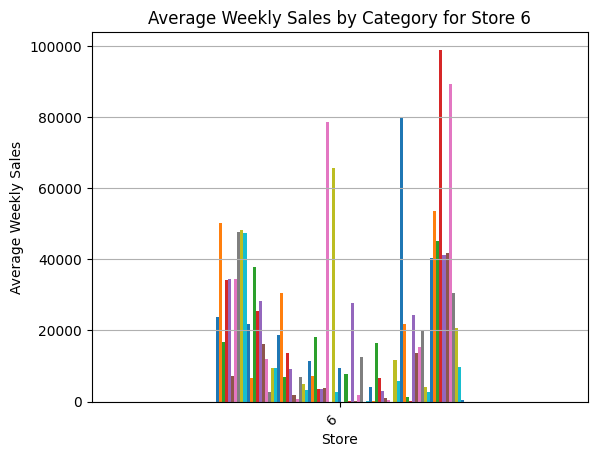

<Figure size 2500x600 with 0 Axes>

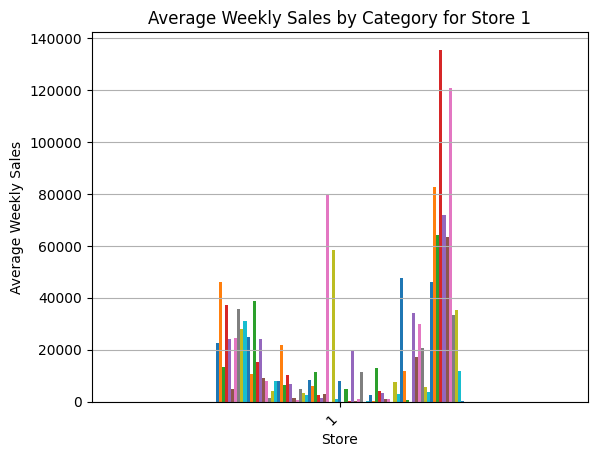

<Figure size 2500x600 with 0 Axes>

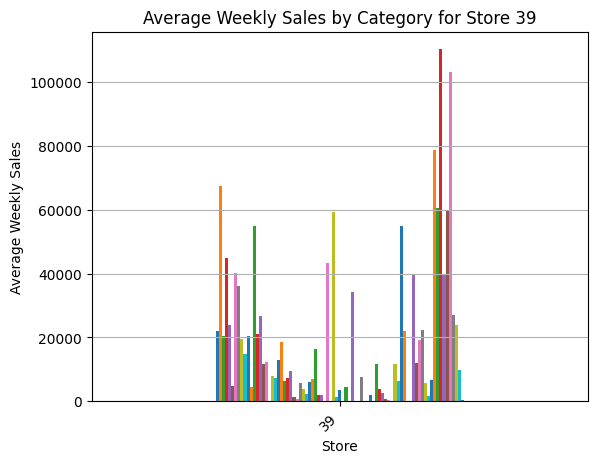

In [ ]:
#6
avg_sales_by_category_store = merged_data.groupby(['Store', 'Category'])['Weekly_Sales'].mean().unstack()
top_10_stores = avg_sales_by_category_store.sum(axis=1).nlargest(10).index

for store in top_10_stores:
    store_data = avg_sales_by_category_store.loc[[store]]
    plt.figure(figsize=(25, 6))
    store_data.plot(kind='bar', legend=False)
    plt.title(f'Average Weekly Sales by Category for Store {store}')
    plt.xlabel('Store')
    plt.ylabel('Average Weekly Sales')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y')
    plt.show()


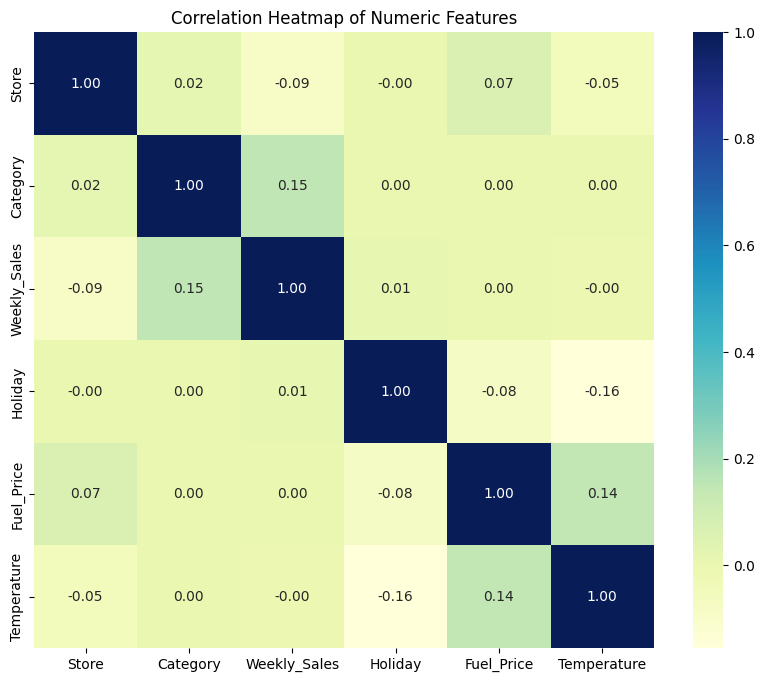

In [ ]:
#Bonus: plot and save a correlation matrix between all of the numerical attributes
numeric_columns = merged_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = merged_data[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


<Axes: >

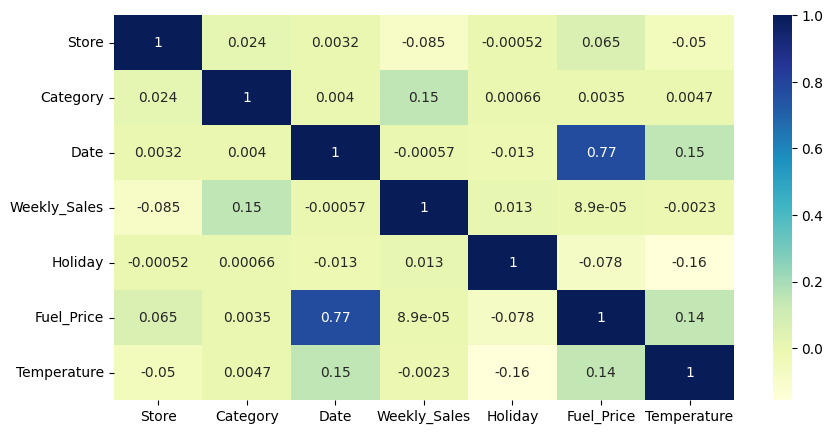

In [ ]:
#Bonus wth date
merged_data['Date'] = pd.to_datetime(merged_data['Date'], format = '%d-%m-%Y')
plt.figure(figsize=(10,5))
sns.heatmap(merged_data.corr(), annot = True, cmap = "YlGnBu")

**As seen there is a correlation between the date and the fuel price and for the weekly sales it's negatively correlated with the store and the date and tempreture and it's highest correlation is with the category**

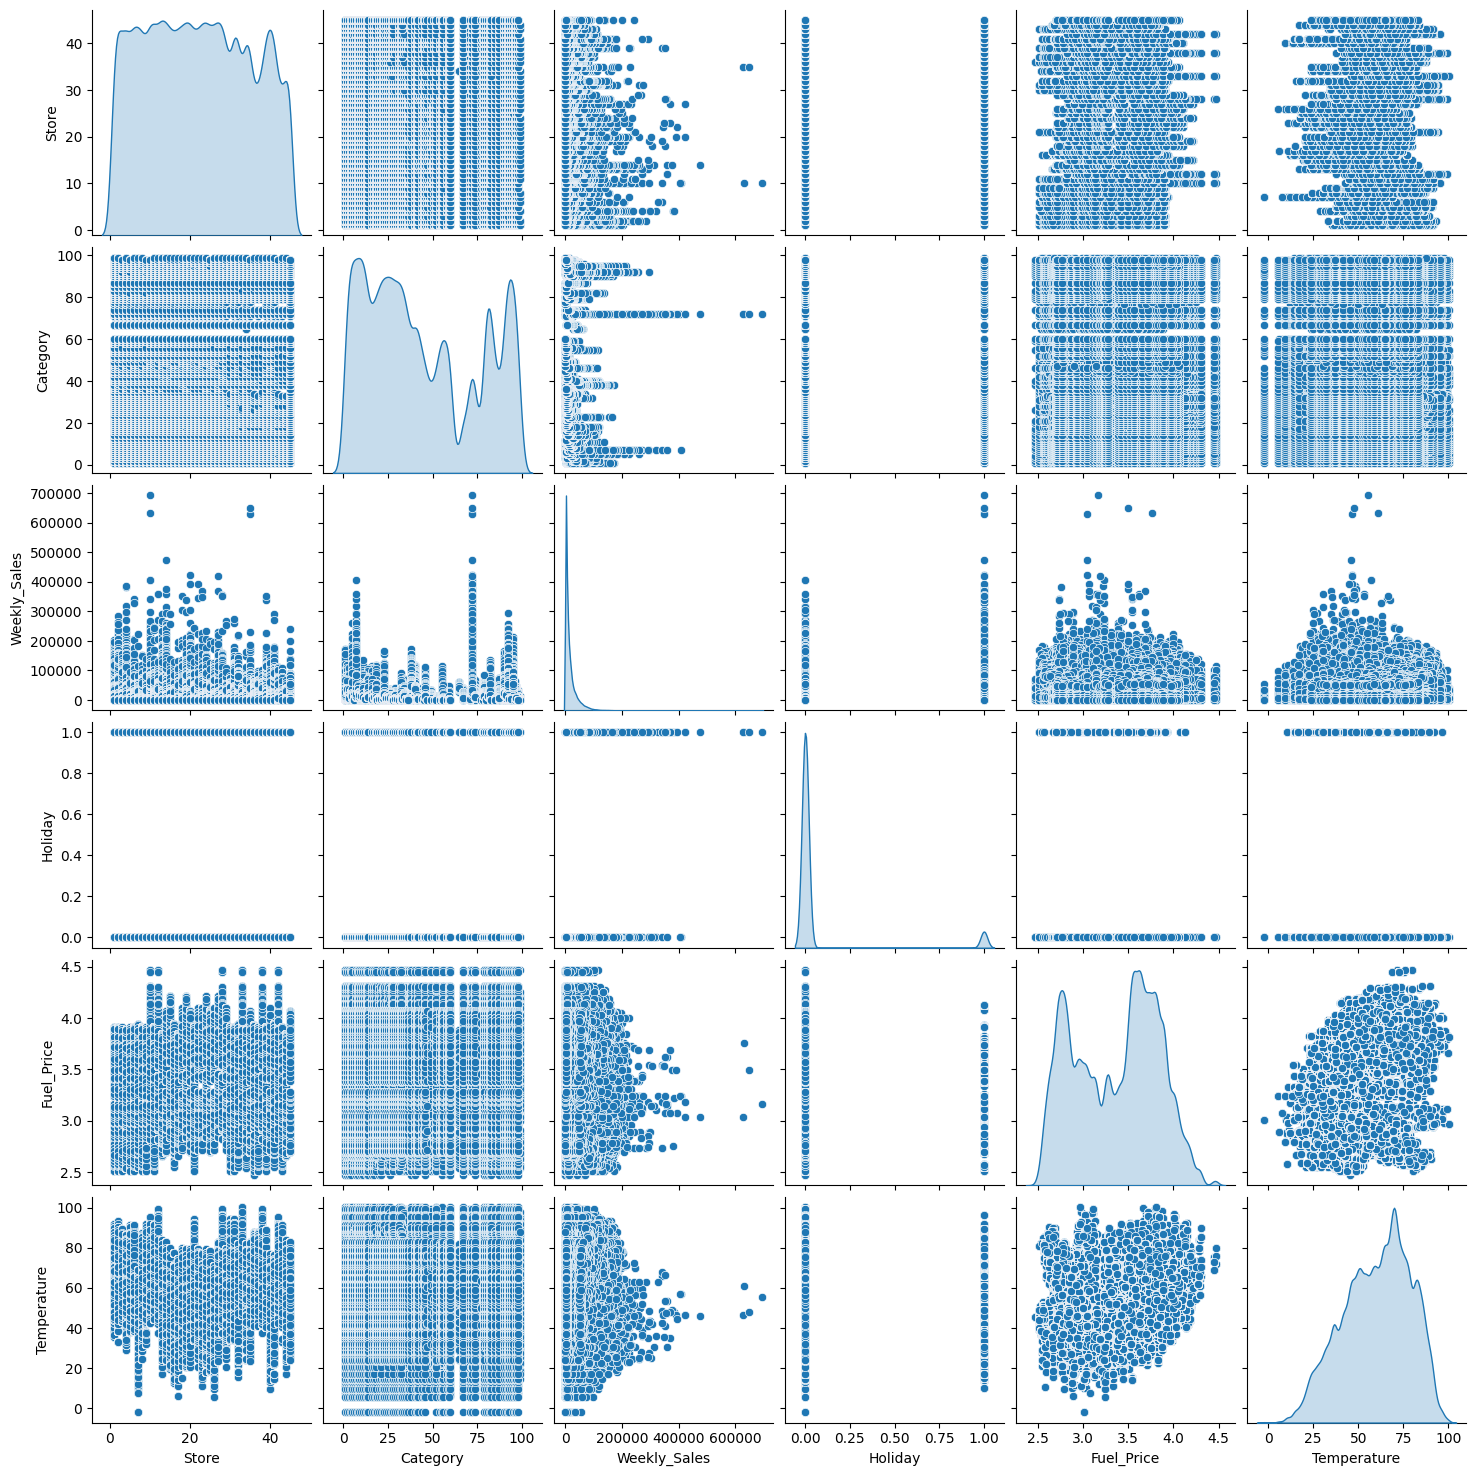

In [ ]:
#create a pair plot to show different correlations.
sns.pairplot(merged_data,diag_kind="kde")

<Figure size 640x480 with 0 Axes>

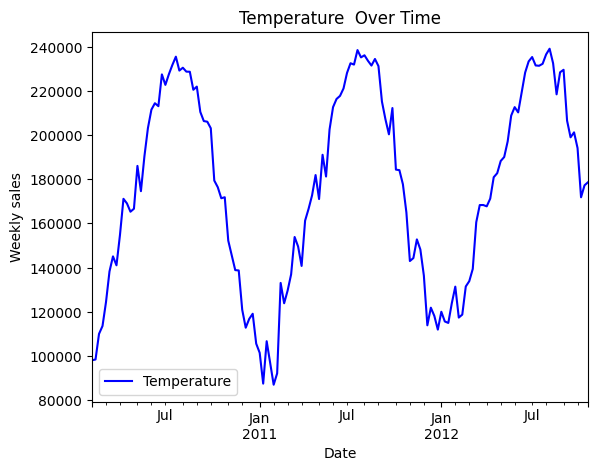

In [ ]:
#weekly sales and temprature over time.
plt.figure()
merged_data.groupby('Date')[['Temperature']].sum().plot(color='b')
plt.title('Temperature  Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly sales')
plt.show()

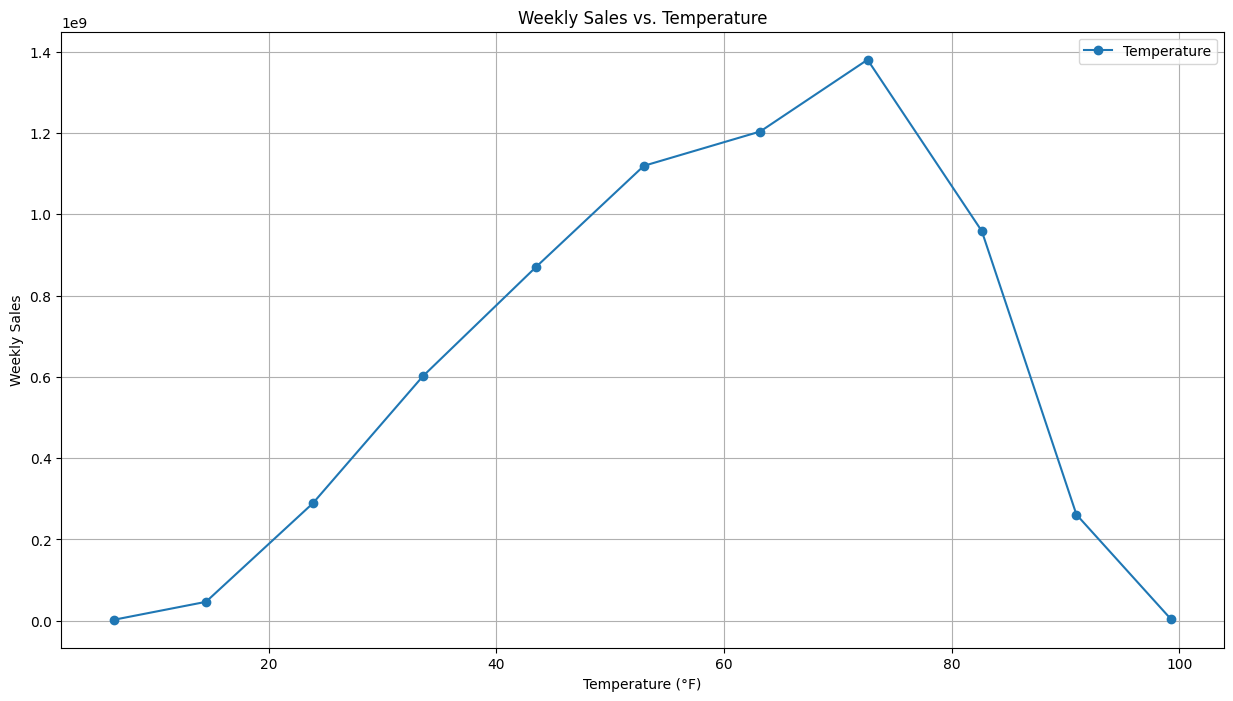

In [ ]:
#weekly sales vs tempreture
temperature_intervals = np.arange(merged_data['Temperature'].min(), merged_data['Temperature'].max() + 10, 10)
fuel_price_intervals = np.arange(merged_data['Fuel_Price'].min(),merged_data['Fuel_Price'].max() + 0.1, 0.1)
merged_data['Temperature_bin'] = pd.cut(merged_data['Temperature'], bins=temperature_intervals)
merged_data['Fuel_Price_bin'] = pd.cut(merged_data['Fuel_Price'], bins=fuel_price_intervals)
temperature_midpoints = merged_data.groupby('Temperature_bin')['Temperature'].mean()
fuel_price_midpoints = merged_data.groupby('Fuel_Price_bin')['Fuel_Price'].mean()
weekly_sales_temp = merged_data.groupby('Temperature_bin')['Weekly_Sales'].sum()
weekly_sales_fuel = merged_data.groupby('Fuel_Price_bin')['Weekly_Sales'].sum()
plt.figure(figsize=(15, 8))
plt.plot(temperature_midpoints, weekly_sales_temp, label='Temperature', marker='o', linestyle='-')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Temperature')
plt.grid(True)
plt.legend()
plt.show()


<Figure size 640x480 with 0 Axes>

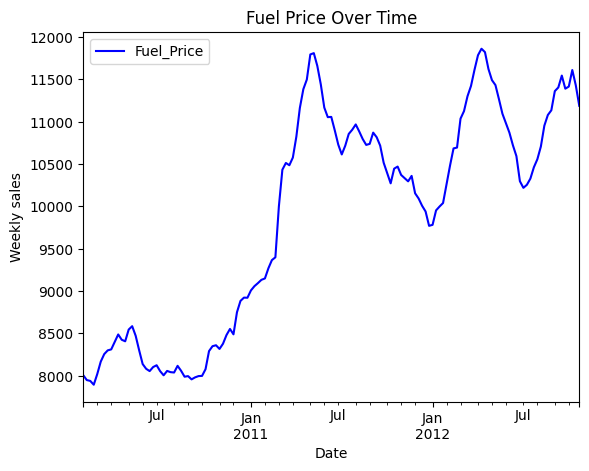

In [ ]:
#fuel price and weekly sales over time
plt.figure()
merged_data.groupby('Date')[['Fuel_Price']].sum().plot(color='b')
plt.title('Fuel Price Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly sales')
plt.show()

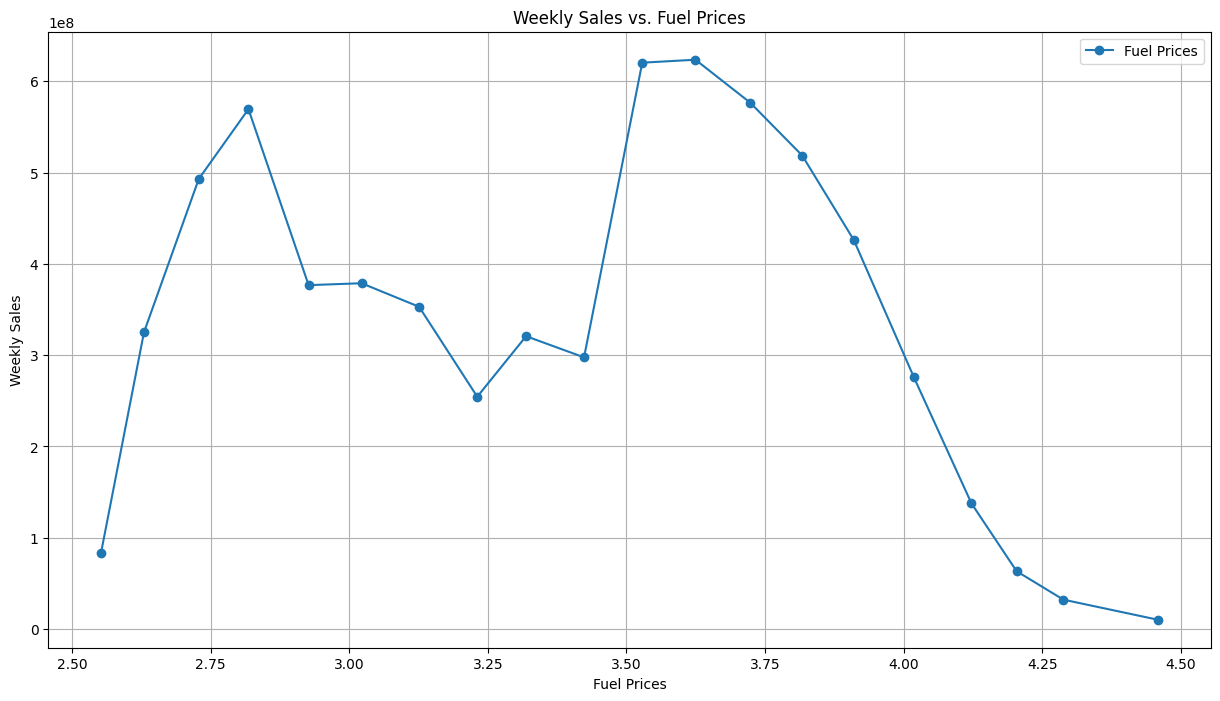

In [ ]:
#weekly sales vs fuel
plt.figure(figsize=(15, 8))
plt.plot(fuel_price_midpoints, weekly_sales_fuel, label='Fuel Prices', marker='o', linestyle='-')
plt.xlabel('Fuel Prices')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales vs. Fuel Prices')
plt.grid(True)
plt.legend()
plt.show()

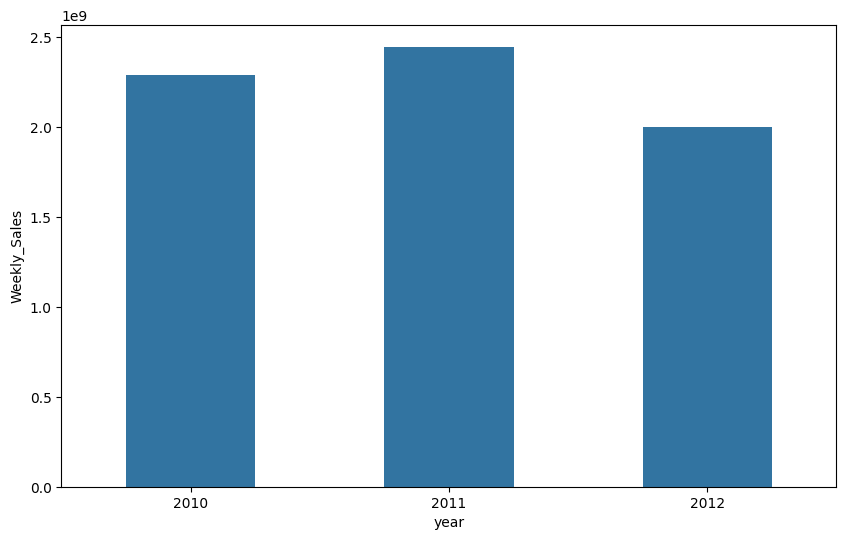

In [ ]:
# the weekly sales of each year
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
merged_data['year'] = merged_data['Date'].dt.year
merged_data['month'] = merged_data['Date'].dt.month
merged_data['day'] = merged_data['Date'].dt.day
yearly_sales = pd.DataFrame(merged_data.groupby('year')['Weekly_Sales'].sum())

plt.figure(figsize=(10,6))
plot = sns.barplot(x = yearly_sales.index, y = yearly_sales['Weekly_Sales'], width=0.5)

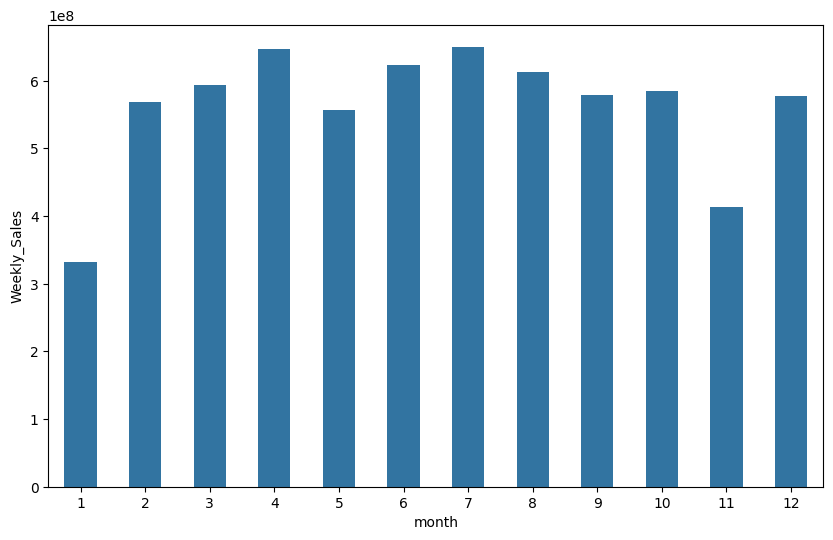

In [ ]:
#weekly sales over each month
monthly_sales = pd.DataFrame(merged_data.groupby('month')['Weekly_Sales'].sum())

plt.figure(figsize=(10,6))
plot = sns.barplot(x = monthly_sales.index, y = monthly_sales['Weekly_Sales'], width=0.5)


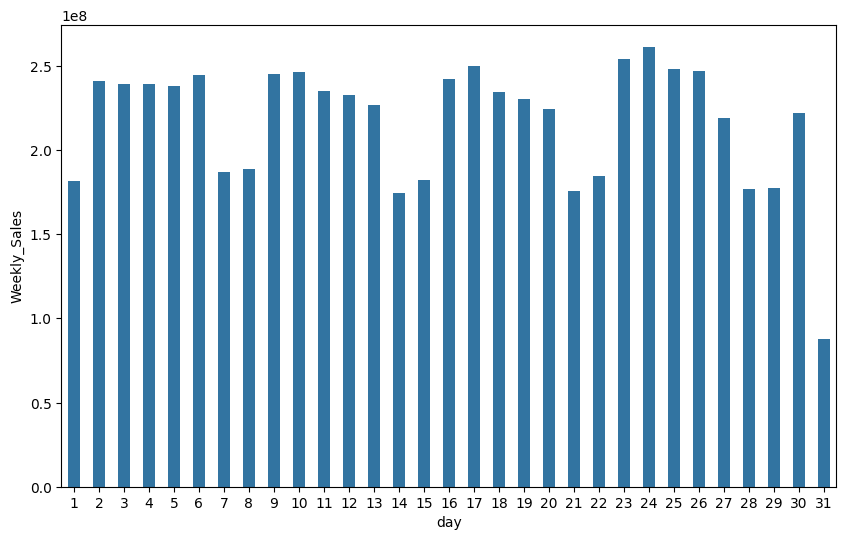

In [ ]:
#weekly sales over each day
daily_sales = pd.DataFrame(merged_data.groupby('day')['Weekly_Sales'].sum())

plt.figure(figsize=(10,6))
plot = sns.barplot(x = daily_sales.index, y = daily_sales['Weekly_Sales'], width=0.5)


In [ ]:
#splitting the data
x=merged_data[['Category','Store','Holiday','Temperature','Fuel_Price']]
y=merged_data['Weekly_Sales']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#linear regression
linear_m=LinearRegression()
linear_m.fit(x_train,y_train)
linear_pred=linear_m.predict(x_test)
linear_mse=mean_squared_error(y_test,linear_pred)
print("linear regression MSE",linear_mse)
linear_r2 = r2_score(y_test, linear_pred)
print("Linear Regression R2:", linear_r2)

linear regression MSE 495564074.8849719
Linear Regression R2: 0.02983824010835301


In [ ]:
#knn_algorithm
knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)
knn_predictions = knn_model.predict(x_test)
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2=r2_score(y_test,knn_predictions)
print("K-nearest neighbors MSE:", knn_mse)
print("K-nearest neighbors R2:",knn_r2)


K-nearest neighbors MSE: 114554518.16449727
K-nearest neighbors R2: 0.7757375512504517


In [ ]:
#random forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Random Forest Regression:")
print("R^2 Score:", r2_rf)
print("Mean Squared Error:", mse_rf)

Random Forest Regression:
R^2 Score: 0.9219431847479881
Mean Squared Error: 39871859.557885155


In [ ]:
# with droping the outliers and with replacing the incorrect with min number of weekly sales.
x_c=data_c[['Category','Store','Holiday']]
y_c=data_c['Weekly_Sales']
x_train_c,x_test_c,y_train_c,y_test_c=train_test_split(x_c,y_c,test_size=0.2,random_state=42)
linear_m_c=LinearRegression()
linear_m_c.fit(x_train_c,y_train_c)
linear_pred_c=linear_m_c.predict(x_test_c)
linear_mse_c=mean_squared_error(y_test_c,linear_pred_c)
print("linear regression MSE",linear_mse_c)



linear regression MSE 128505043.56109475


In [ ]:
# with droping the outliers and with replacing the incorrect with min number of weekly sales.
rf_c = RandomForestRegressor(n_estimators=100, random_state=42)
rf_c.fit(x_train_c, y_train_c)

y_pred_rf_c = rf_c.predict(x_test_c)
r2_rf_c = r2_score(y_test_c, y_pred_rf_c)
mse_rf_c = mean_squared_error(y_test_c, y_pred_rf_c)

print("Random Forest Regression:")
print("R^2 Score:", r2_rf_c)
print("Mean Squared Error:", mse_rf_c)


Random Forest Regression:
R^2 Score: 0.9122763992032271
Mean Squared Error: 11312525.193679137


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

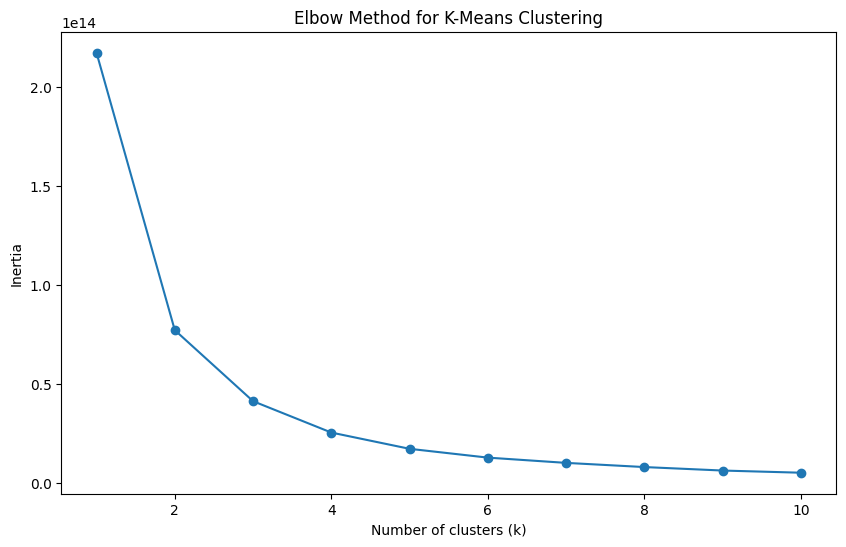

In [ ]:
#clustering the category and weeklysales
X = merged_data[['Category','Weekly_Sales']]

inertia_scores = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_scores, marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for K-Means Clustering')
plt.show()



In [ ]:
#the test with a metric to see best cluster
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = davies_bouldin_score(X, kmeans.labels_)
    print(f"k={k}, Davies-Bouldin Score: {score}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



k=2, Davies-Bouldin Score: 0.5134985288952144


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



k=3, Davies-Bouldin Score: 0.5377055844712858


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



k=4, Davies-Bouldin Score: 0.5245951817605812


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



k=5, Davies-Bouldin Score: 0.5065858990580144


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



k=6, Davies-Bouldin Score: 0.5095534686262283


**After examining elbow method it's obvious that the best number of clusters is 5 or 6 and after the examination with davies bouldin metric with both numbers  the number of clusters is better to be 5**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

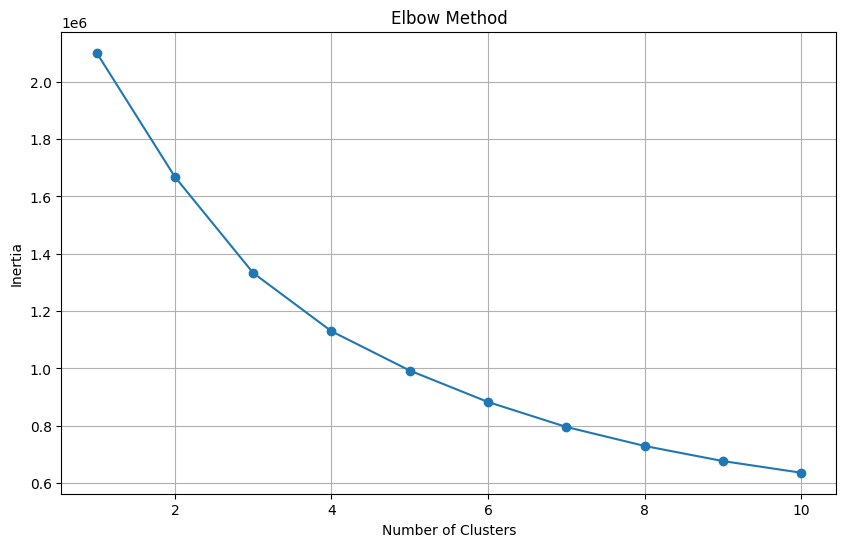

In [ ]:
#clustring the whole data
scaler = StandardScaler()
X = scaler.fit_transform(x)

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

In [ ]:
#testing with a metric
for n_clusters in range(3, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    davies_bouldin_score_n = davies_bouldin_score(X, kmeans.labels_)
    print("Davies-Bouldin Score for {} clusters: {:.4f}".format(n_clusters, davies_bouldin_score_n))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Davies-Bouldin Score for 3 clusters: 1.5284


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Davies-Bouldin Score for 4 clusters: 1.3670


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Davies-Bouldin Score for 5 clusters: 1.3094


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Davies-Bouldin Score for 6 clusters: 1.2218


**And in clustring the whole data the number of clusters is better to be 6 according to the elbow method and davies bouldin metric**